In [3]:
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2 as cv
import face_recognition
import tensorflow as tf
import numpy as np

In [4]:
model = tf.keras.models.load_model("../resources/emotion_detector_model_v6_23.h5")

2021-07-18 17:06:50.581535: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}
label_map = dict((v,k) for k,v in emotion_dict.items()) 
emotion_colors= {'Angry': 'r', 'Sad': 'b', 'Neutral': 'c', 'Disgust': 'k', 'Surprise': 'y', 'Fear': 'm', 'Happy': 'g'}

def recognize_emotion(face_image):
    face_image = cv.resize(face_image, (48,48))
    face_image = cv.cvtColor(face_image, cv.COLOR_RGB2GRAY)
    face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])
    olayer = model.predict(face_image)
    predicted_class = np.argmax(olayer)
    predicted_label = label_map[predicted_class]
    return predicted_label, olayer

In [8]:
files = glob.glob('../data/*')

In [9]:
files

['../data/IMG_20210718_142526359.jpg',
 '../data/IMG_20210718_142911451.jpg',
 '../data/IMG_20210718_142847192_BURST000_COVER_TOP.jpg',
 '../data/IMG_20210718_142513178.jpg',
 '../data/IMG_20210718_142534718.jpg',
 '../data/IMG_20210718_142943805.jpg',
 '../data/IMG_20210718_142932458_BURST000_COVER_TOP.jpg',
 '../data/IMG_20210718_142548219.jpg',
 '../data/IMG_20210718_143025206.jpg',
 '../data/IMG_20210718_142852958.jpg',
 '../data/IMG_20210718_142552594.jpg',
 '../data/IMG_20210718_143016888.jpg',
 '../data/IMG_20210718_143012052.jpg',
 '../data/IMG_20210718_142902508.jpg',
 '../data/IMG_20210718_142938833.jpg',
 '../data/IMG_20210718_142857698.jpg',
 '../data/IMG_20210718_142543314.jpg',
 '../data/IMG_20210718_142951339.jpg',
 '../data/IMG_20210718_142841802.jpg']

In [10]:
img = cv.imread(files[-5])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

(-0.5, 3071.5, 4095.5, -0.5)

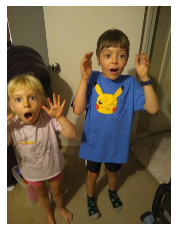

In [13]:
plt.imshow(img)
plt.axis('off')

NameError: name 'plt' is not defined

In [15]:
face_locations = face_recognition.face_locations(img)

In [16]:
face_locations

[(788, 2267, 1343, 1712), (1589, 664, 2144, 110)]

Surprise


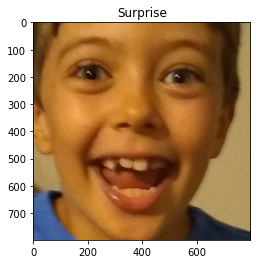

In [28]:
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = img[top:bottom, left:right]    
    emotion, olayer = recognize_emotion(face_image)
    plt.figure()
    plt.imshow(face_image)
    plt.title(emotion)

Surprise
[[0.0000000e+00 0.0000000e+00 3.2221482e-29 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]


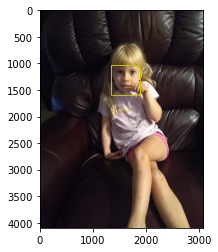

Surprise
[[0. 0. 0. 0. 0. 0. 1.]]


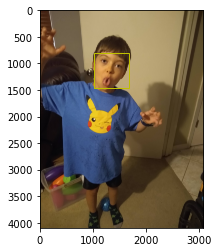

Fear
[[5.0785664e-18 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


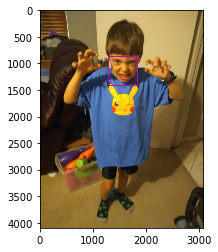

Fear
[[0.0000000e+00 0.0000000e+00 9.9985242e-01 1.4754976e-04 0.0000000e+00
  0.0000000e+00 1.6114672e-27]]


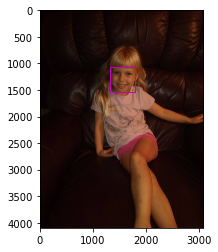

Happy
[[0.0000000e+00 0.0000000e+00 3.9355757e-28 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


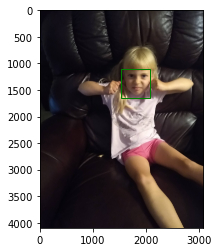

Happy
[[5.4965136e-13 0.0000000e+00 1.2683724e-10 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
Surprise
[[0.000000e+00 0.000000e+00 2.075133e-32 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00]]


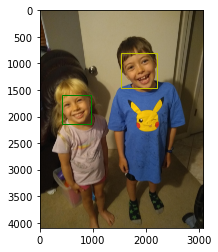

Surprise
[[0. 0. 0. 0. 0. 0. 1.]]


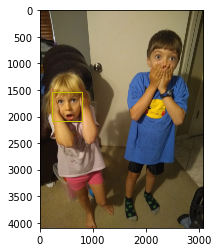

Fear
[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.7961962e-21 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


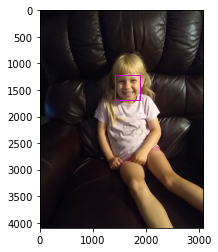

Surprise
[[0. 0. 0. 0. 0. 0. 1.]]
Surprise
[[0. 0. 0. 0. 0. 0. 1.]]


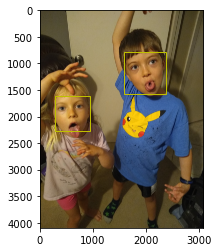

Happy
[[0.000000e+00 0.000000e+00 6.643878e-13 9.246856e-01 2.709378e-21
  0.000000e+00 7.531444e-02]]


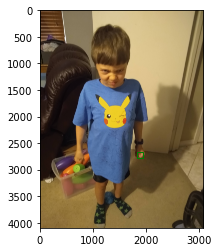

Surprise
[[0.0000000e+00 0.0000000e+00 5.0942272e-17 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]


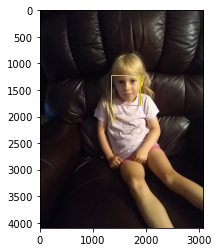

Surprise
[[0. 0. 0. 0. 0. 0. 1.]]


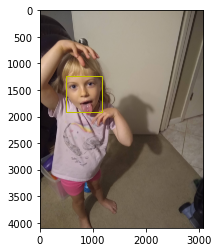

Surprise
[[0. 0. 0. 0. 0. 0. 1.]]


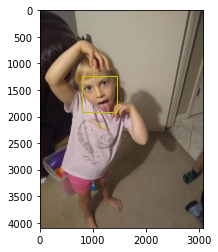

Fear
[[0. 0. 1. 0. 0. 0. 0.]]


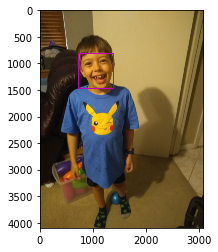

Surprise
[[0. 0. 0. 0. 0. 0. 1.]]
Surprise
[[0. 0. 0. 0. 0. 0. 1.]]


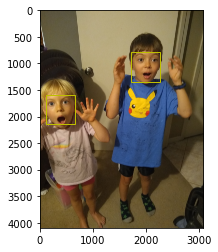

Surprise
[[0. 0. 0. 0. 0. 0. 1.]]


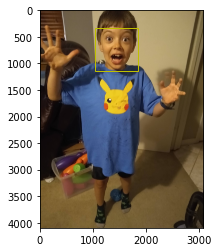

Surprise
[[0. 0. 0. 0. 0. 0. 1.]]


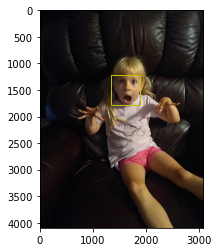

Surprise
[[0.0000000e+00 0.0000000e+00 2.1469976e-19 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00]]
Fear
[[0.0000000e+00 0.0000000e+00 9.9999940e-01 6.1590606e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


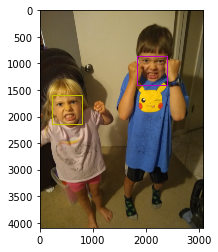

Surprise
[[0.0000000e+00 0.0000000e+00 5.7366586e-05 0.0000000e+00 0.0000000e+00
  0.0000000e+00 9.9994266e-01]]


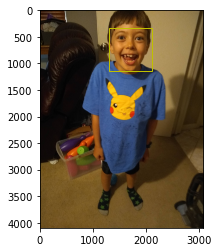

In [30]:
for fname in files:
    img = cv.imread(fname)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(img)
        
    plt.figure()
    plt.imshow(img)
    ax = plt.gca()    
    for face_location in face_locations:
        top, right, bottom, left = face_location
        width, height = right-left, bottom-top
        face_image = img[top:bottom, left:right]    
        emotion, olayer = recognize_emotion(face_image)
        print(emotion)
        print(olayer)
        color = emotion_colors.get(emotion, 'k')
        rect = patches.Rectangle((left, top), width, height, linewidth=1, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
    plt.show()


In [ ]:
plt.text(0.5, 0.8, 'Test', color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))

In [34]:
face_landmarks_list = face_recognition.face_landmarks(img)

In [37]:
face_landmarks = face_landmarks_list[0]

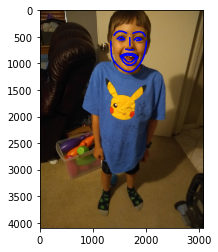

In [50]:
plt.imshow(img)
for facial_feature in face_landmarks.keys():
    plt.plot(*zip(*face_landmarks[facial_feature]), 'b')

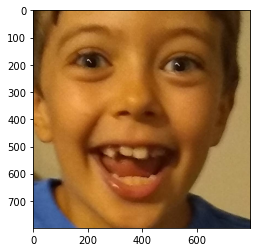

In [33]:
plt.imshow(face_image, cmap='gray')

Surprise
